# Практика застосування дерева рішень. EDA датасету Pima Indians Diabetes

### Знайомство з даними

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('../datasets/mod_03_topic_06_diabets_data.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Перевірка типів даних і відсутніх значень

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X, y = (data.drop('Outcome', axis=1), data['Outcome'])

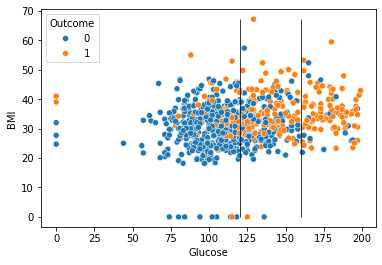

In [5]:
ax = sns.scatterplot(x=X['Glucose'], y=X['BMI'], hue=y)
ax.vlines(x=[120, 160],
          ymin=0,
          ymax=X['BMI'].max(),
          color='black',
          linewidth=0.75)

# Практика застосування дерева рішень. Підготовка й обробка даних

### Розбиття на тренувальну і тестову вибірки

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42)

# Практика застосування дерева рішень. Навчання й оцінка моделі

### Побудова моделі

In [7]:
clf = (tree.DecisionTreeClassifier(
    random_state=42)
    .fit(X_train, y_train))

y_pred = clf.predict(X_test)

acc = balanced_accuracy_score(y_test, y_pred)

print(f'Acc.: {acc:.1%}')

Acc.: 69.8%


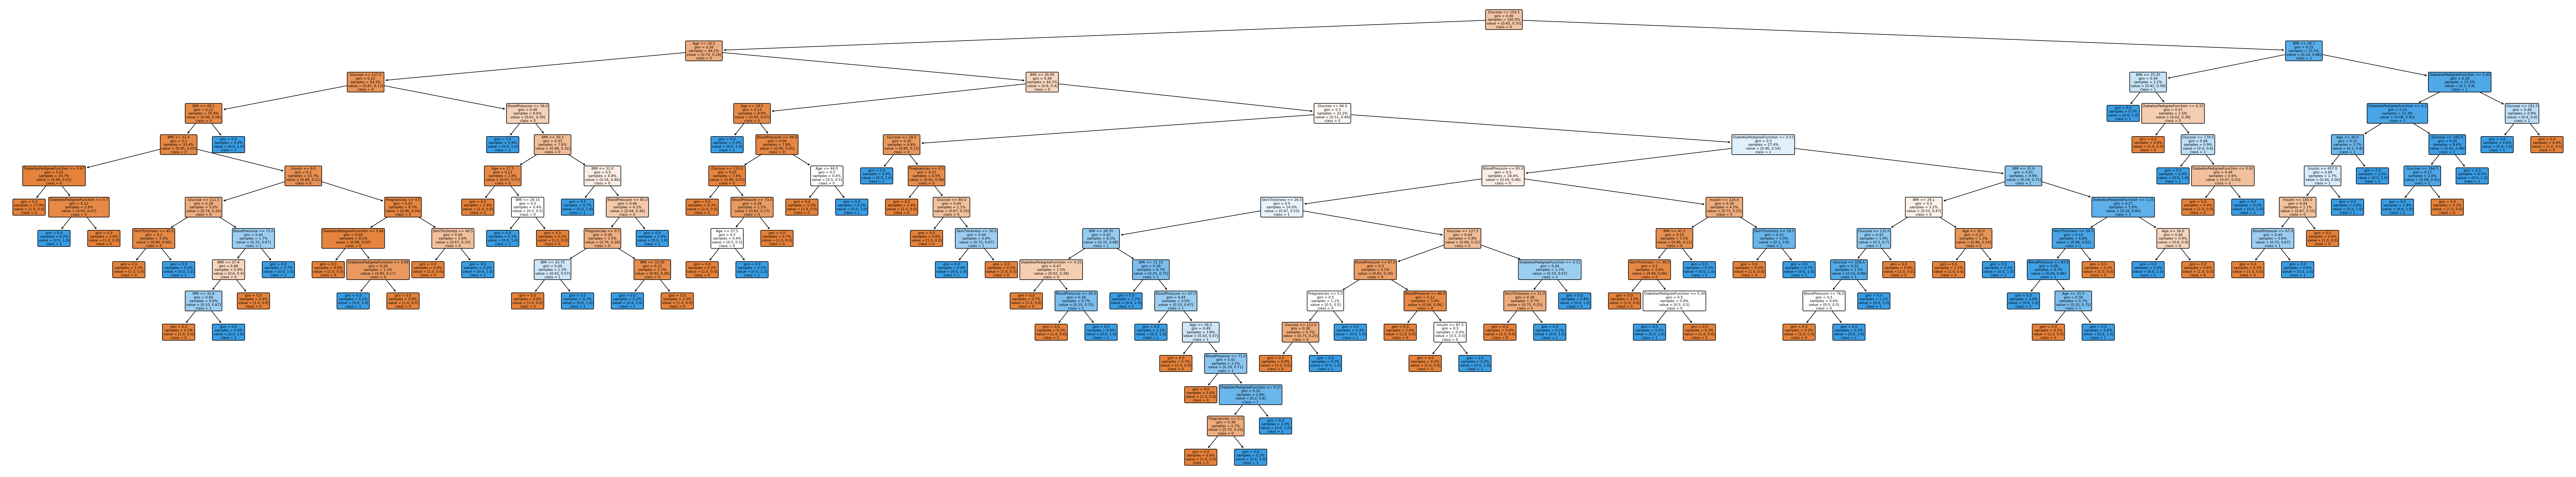

In [8]:
plt.figure(figsize=(80, 15), dpi=196)

tree.plot_tree(clf,
               feature_names=X.columns,
               filled=True,
               fontsize=6,
               class_names=list(map(str, y_train.unique())),
               proportion=True,
               precision=2,
               rounded=True)

plt.savefig('../derived/mod_03_topic_06_decision_tree.png')

### Балансування класів

In [9]:
y_train.value_counts(normalize=True)

Outcome
0    0.649907
1    0.350093
Name: proportion, dtype: float64

In [10]:
sm = SMOTE(random_state=42, k_neighbors=10)
X_res, y_res = sm.fit_resample(X_train, y_train)

y_res.value_counts(normalize=True)

Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64

### Додаткові параметри навчання

In [11]:
clf_upd = (tree.DecisionTreeClassifier(
    max_depth=4,
    random_state=42)
    .fit(X_res, y_res))

y_pred_upd = clf_upd.predict(X_test)

acc = balanced_accuracy_score(y_test, y_pred_upd)

print(f'Acc.: {acc:.1%}')

Acc.: 72.5%


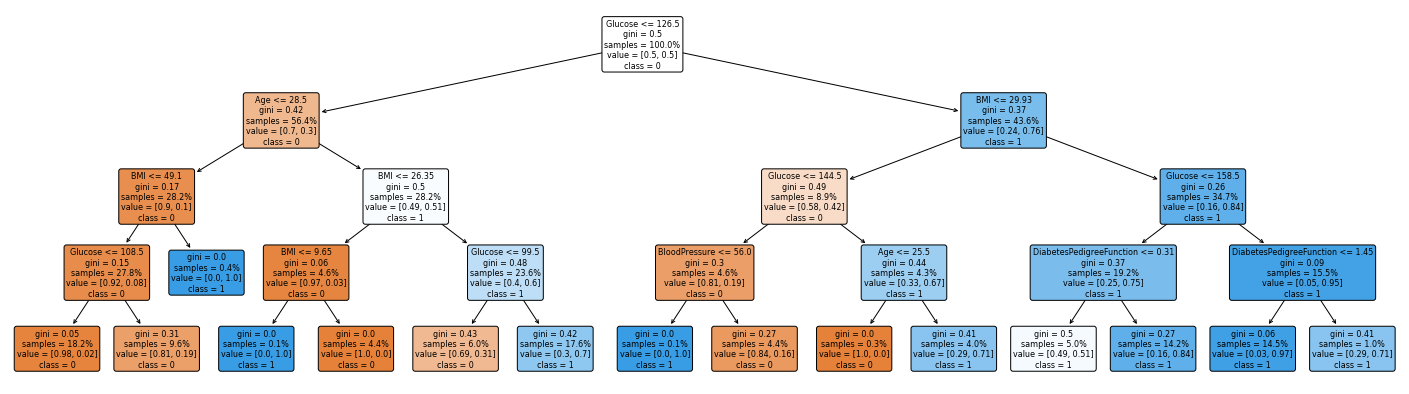

In [12]:
plt.figure(figsize=(25, 7))

tree.plot_tree(clf_upd,
               feature_names=X.columns,
               filled=True,
               fontsize=8,
               class_names=list(map(str, y_res.unique())),
               proportion=True,
               precision=2,
               rounded=True)

# Важливість ознак в моделі

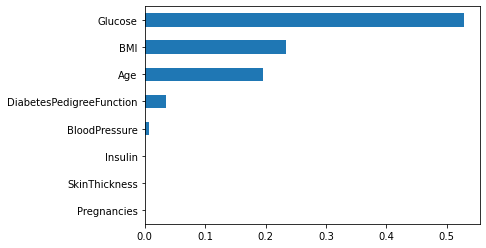

In [13]:
(pd.Series(
    data=clf_upd.feature_importances_,
    index=X.columns)
    .sort_values(ascending=True)
    .plot
    .barh())